# Varmepumpeberegninger
Vi ser på en modell for beregning av kostnader til oppvarming med og uten varmepumpe. 
Vi beregner kostnaden med og uten varmepumpe. 
Pumpen har en effektfaktor (Coefficient of Performance) som beskriver hvor mye varmeenergi man får for hver enhet elektrisk energi.
Videre inngår et energibehov som kan være konstant eller avhengig av temperatur, i likhet med effektfaktoren.

Modellen er en
$$
\text{Kostnad} = \text{Energiforbruk} \times \text{Pris per energienhet} \\
\text{Energiforbruk med varmepumpe} = \text{Effektfaktor} \times \text{Energibehov} \\
\text{Energiforbruk uten varmepumpe} = \text{Energibehov}
$$
Vi ser på to ulike modeller. 
I den første modellen er energibehovet, effektfaktoren og strømprisen konstant, mens i den andre modellen er energibehovet avhengig av utetemperaturen.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def middeltemperatur():
    """Returnerer middeltemperaturen.

    Returverdi:
        int: Middeltemperaturen på 10 grader.
    """
    return 10


def temperatur(t):
    """Beregn temperaturen basert på tid.

    Parametre:
        t (array-like): En array av tidspunkter.

    Returverdi:
        array-like: Temperaturen for hver tid i t.
    """
    # Tid på året i år. Middeltemperatur på 10 grader. Kaldest ved t=0.1, dvs. slutten av januar.
    årsfluktuasjon = - 10 * np.cos(2 * np.pi * t - 0.1)
    daglig_fluktuasjon = 2 * np.random.randn(np.size(t))
    return middeltemperatur() + årsfluktuasjon + daglig_fluktuasjon


def kostnad_uten_varmepumpe(oppvarmingsbehov, strømpris):
    """Beregn kostnaden ved oppvarming uten varmepumpe.

    Parametre:
        oppvarmingsbehov (array-like): Oppvarmingsbehovet i kWh.
        strømpris (array-like): Strømprisen i NOK/kWh.

    Returverdi:
        array-like: Kostnaden ved oppvarming uten varmepumpe.
    """
    # np.cumsum (cumulative sum) summerer opp elementene i en array.
    # Hvert element i den resulterende arrayen er summen av alle elementene i input-arrayen
    # opp til og med det elementet. Eks: np.cumsum([1, 2, 3]) = [1, 3, 6]
    return np.cumsum(oppvarmingsbehov * strømpris)

def kostnad_med_varmepumpe(oppvarmingsbehov, strømpris, cop):
    """Beregn kostnaden ved oppvarming med varmepumpe.

    Parametre:
        oppvarmingsbehov (array-like): Oppvarmingsbehovet i kWh.
        strømpris (array-like): Strømprisen i NOK/kWh.
        cop (array-like): COP for varmepumpen.

    Returverdi:
        array-like: Kostnaden ved oppvarming med varmepumpe.
    """
    # Se beskrivelse av np.cumsum i kostnad_uten_varmepumpe.
    return np.cumsum(oppvarmingsbehov * strømpris / cop)



### Effektfaktor, strømpris og energibehov 
Definer konstant og temperaturavhengig effektfaktor, strømpris og energibehov.

Andre valg enn de vi ser her er selvfølgelig også mulig. 
Verdiene på effektfaktor, strømpris og energibehov er ganske tilfeldig valgt - man kan godt gjøre grundingere undersøkelser for å finne mer realistiske verdier.

Tips til forenkling av modell: Man kan ta vekk maximum-funksjonen og la strømprisen og effektfaktoren
avhenge av temperaturforskjellen fra 10 grader. Dette vil gi en lineær økning i 
strømprisen med fallende temperatur, også over 10 grader. Da ser funksjonen slik ut:
return 0.3 + 0.3 * (10 - temperatur)


In [6]:
def temperaturavhengig_cop(temperatur):
    """Beregn COP (Coefficient of Performance) for en varmepumpe basert på temperatur.

    Parametere:
        temperatur (array-like): Temperaturen i grader Celsius.

    Returverdi:
        array-like: COP for en varmepumpe basert på temperatur.
    """
    # COP er 3 ved 10 grader, og synker med 0.1 for hver grad temperaturen synker. Andre
    # verdier er selvfølgelig også mulig.
    return 3 - 0.1 * np.maximum(0, 10 - temperatur)

def konstant_cop(temperatur):
    """Beregn COP (Coefficient of Performance) for en varmepumpe.

    Parametre:
        temperatur (array-like): Temperaturen i grader Celsius. Ikke brukt i beregningen, men
            inkludert for at man skal kunne bytte mellom funksjoner (denne eller
            temperaturavhengig_cop) uten å endre signatur.

    Returverdi:
        int: En konstant COP på 3.
    """
    return 3

def temperaturavhengig_strømpris(t, temperatur):
    """Beregn strømprisen basert på tid og temperatur.

    Parametere:
        t (array-like): Tidspunktet (ikke brukt i beregningen, men inkludert for
            fremtidig bruk).
        temperatur (array-like): Temperaturen i grader Celsius.

    Returverdi:
        array-like: Strømprisen i NOK/kWh. Basert på en grunnpris på 0,3 NOK/kWh, med en
        økning på 0,3 NOK/kWh for hver grad temperaturen er under 10 grader Celsius.
    """

    return 0.3 + 0.3 * np.maximum(0, 10 - temperatur)

def konstant_strømpris(t, temperatur):
    """Beregn strømprisen basert på tid og temperatur.

    Parametere:
        t (array-like): Tidspunktet (ikke br
    """
    return 0.3

def konstant_energibehov(t):
    """Returnerer et konstant energibehov.

    Parametere:
        t (array-like): Tidsparameteren (ikke brukt i beregningen).

    Returverdi:
        int: En konstant verdi på 20.
    """
    return 20

def temperaturavhengig_energibehov(t):
    """Beregn det temperaturavhengige energibehovet.

    Denne funksjonen beregner energibehovet basert på temperaturen. Energibehovet øker
    når temperaturen synker. I tillegg legges det til en tilfeldig støy på 2 kWh/dag. Vi
    trekker fra middeltemperaturen i temperaturleddet fluktuerer for å oppnå samme
    årsmiddel som i konstant_energibehov.

    Parametre:
        t (array-like): En array av tidspunkter.

    Returverdi:
        array-like: Det beregnede energibehovet for hver tid i t.
    """
    temperatureffekt = - 0.5 * (temperatur(t) - middeltemperatur())
    dagsfluktuasjon = 2 * np.random.randn(np.size(t))
    return konstant_energibehov(t) + dagsfluktuasjon + temperatureffekt

Definer plottefunksjoner. Disse kan brukes for å visualisere resultatene.

In [7]:

def plott_total_sparing(t, spart, gå_i_null_dag):
    """Plott total sparing over tid.

    Parametre:
        t (array-like): Tidspunktene.
        spart (array-like): Total sparing over tid.
        gå_i_null_dag (int): Dagen der man har betalt like mye for oppvarming med og uten varmepumpe.
    """
    plt.figure()
    plt.plot(t, spart)
    plt.axvline(gå_i_null_dag / 365, color='r', linestyle='--')
    # Legg til markører for dagen hvor man går i null
    plt.plot(gå_i_null_dag / 365, 0, 'ro')
    hele_år = gå_i_null_dag // 365
    resterende_dager = gå_i_null_dag % 365
    plt.text(gå_i_null_dag / 365, 0, f'Går i null etter {hele_år} år og {resterende_dager} dager', verticalalignment='bottom')
    plt.xlabel('Tid [år]')
    plt.ylabel('Total sparing [NOK]')
    plt.title('Total sparing over tid')

def plott_kostnader(t, kostnad_uten, kostnad_med, gå_i_null_dag=None):
    """Plott kostnadene over tid.

    Plotter kostnadene over tid, og legger til en vertikal linje for dagen
    der man går i null.

    Parametre:
        t (array-like): Tidspunktene.
        kostnad_uten (array-like): Kostnadene uten varmepumpe.
        kostnad_med (array-like): Kostnadene med varmepumpe.
        gå_i_null_dag (int): Dagen der man har betalt like mye for oppvarming med og uten varmepumpe.
    """
    plt.figure()
    plt.plot(t, kostnad_uten, label='Kostnad uten varmepumpe')
    plt.plot(t, kostnad_med, label='Kostnad med varmepumpe')
    if gå_i_null_dag is not None:
        plt.axvline(gå_i_null_dag / 365, color='r', linestyle='--')
        # Legg til markører
        hele_år = gå_i_null_dag // 365
        resterende_dager = gå_i_null_dag % 365
        plt.text(gå_i_null_dag / 365, 0, f'Går i null etter {hele_år} år og {resterende_dager} dager', verticalalignment='bottom')
    plt.xlabel('Tid [år]')
    plt.ylabel('Total kostnad [NOK]')
    plt.title('Total kostnad over tid')
    plt.legend()

def plott_temperatur_og_oppvarmingsbehov(t, temperatur, behov):
    """Plott temperatur og oppvarmingsbehov over tid.

    Parametre:
        t (array-like): Tidspunktene.
        temperatur (array-like): Temperaturen.
        behov (array-like): Oppvarmingsbehovet.
    """
    plt.figure()
    plt.plot(t, temperatur, label='Temperatur')
    plt.plot(t, behov, label='Oppvarmingsbehov')
    plt.xlabel('Tid [år]')
    plt.ylabel('Temperatur [C] / Oppvarmingsbehov [kWh]')
    plt.title('Temperatur og oppvarmingsbehov over tid')
    plt.legend()

# Kjør simuleringen
Vi kjører simuleringen for å se på kostnaden med og uten varmepumpe.
Her setter vi investeringskostnaden til 20 000, og ser på kostnaden over 5 år.

Går i null etter 1158 dager


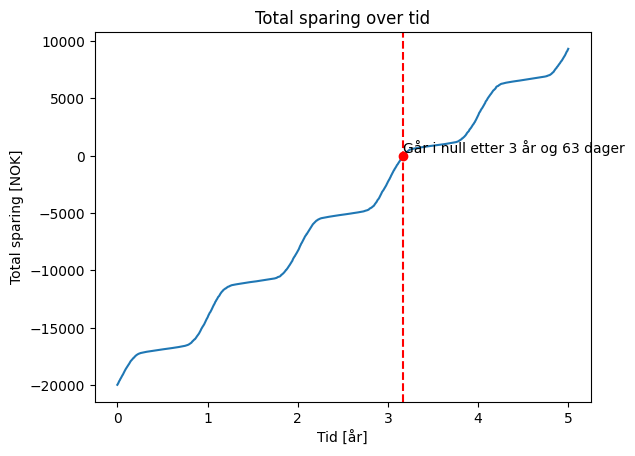

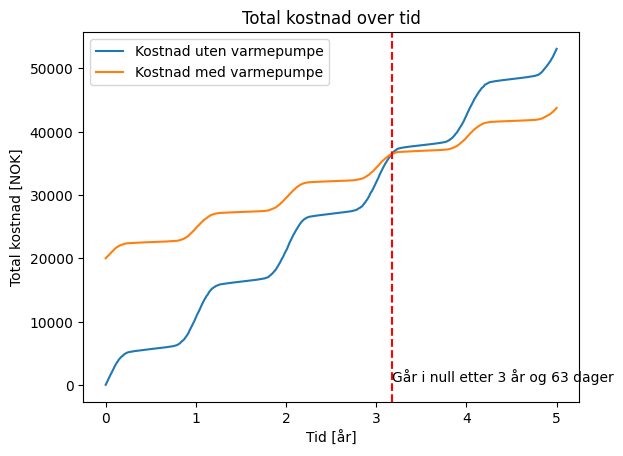

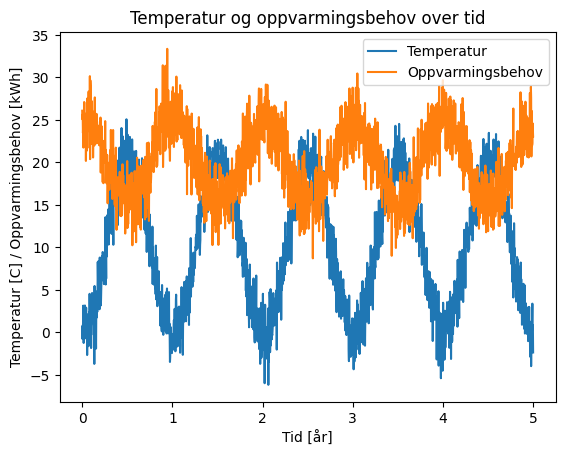

In [8]:
# Generer daglige oppvarmingsdata
np.random.seed(1)
num_years = 5
# Tid i år. Anta et år med 365 dager
t = np.linspace(0, num_years, 365 * num_years)

# Velg metode for strømpris, COP og energibehov
konstant_modell = False
if konstant_modell:
    strømpris = konstant_strømpris
    cop = konstant_cop
    energibehov = konstant_energibehov
else:
    strømpris = temperaturavhengig_strømpris
    cop = temperaturavhengig_cop
    energibehov = temperaturavhengig_energibehov

# Beregn kostnader og besparelser
investeringskostnad = 20000
pris = strømpris(t, temperatur(t))
kostnad_uten = kostnad_uten_varmepumpe(energibehov(t), pris)
kostnad_med = kostnad_med_varmepumpe(energibehov(t), pris, cop(temperatur(t)))
spart = -investeringskostnad - kostnad_med + kostnad_uten
gå_i_null_dag = np.argmax(spart > 0)

print(f'Går i null etter {gå_i_null_dag} dager')
plott_total_sparing(t, spart, gå_i_null_dag)
plott_kostnader(t, kostnad_uten, investeringskostnad + kostnad_med, gå_i_null_dag)
plott_temperatur_og_oppvarmingsbehov(t, temperatur(t), energibehov(t))
